<h3>Import all packages</h3>

In [1]:
import pandas as pd
import numpy as np
import math

<h3> Operations with dataframe </h3>

In [2]:
df = pd.read_csv("Development_IT.csv")
df

,id,title,url,is_paid,num_subscribers,avg_rating,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
0,567828,2020 Complete Python Bootcamp: From Zero to He...,/course/complete-python-bootcamp/,True,1086954,4.56326,4.56743,314098,152,0,2015-07-29T00:12:23Z,2015-10-12T21:42:53Z,455.0,8640.0
1,625204,The Web Developer Bootcamp,/course/the-web-developer-bootcamp/,True,592474,4.64777,4.65291,181621,405,0,2015-09-28T21:32:19Z,2015-11-02T21:13:27Z,455.0,8640.0
2,950390,Machine Learning A-Z™: Hands-On Python & R In ...,/course/machinelearning/,True,687330,4.55210,4.54932,131007,323,0,2016-09-05T09:54:22Z,2016-09-13T21:43:44Z,455.0,8640.0
3,756150,Angular - The Complete Guide (2020 Edition),/course/the-complete-guide-to-angular-2/,True,417746,4.57687,4.58594,128705,455,0,2016-02-08T17:02:55Z,2016-02-11T07:29:29Z,462.0,8640.0
4,533682,Java Programming Masterclass for Software Deve...,/course/java-the-complete-java-developer-course/,True,497195,4.56571,4.57203,122306,400,0,2015-06-21T20:25:56Z,2015-07-21T22:01:13Z,455.0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32746,1516977,Fundamental Service Oriented Arch (SOA) Securi...,/course/fundamental-service-oriented-arch-soa-...,True,16,3.25000,2.65702,2,0,2,2018-01-19T09:03:46Z,2018-01-28T09:20:37Z,455.0,1280.0
32747,1479824,Linux Certification for Experts - Practice Tes...,/course/linux-certification-for-beginners-prac...,True,15,4.00000,3.56818,2,0,2,2017-12-23T12:44:39Z,2017-12-24T07:38:36Z,455.0,1280.0
32748,1879598,SAP SuccessFactors Employee Central Payroll Fu...,/course/public-transport-management-systems/,True,19,2.75000,2.70354,2,5,0,2018-08-27T14:43:42Z,2018-09-19T23:19:18Z,1280.0,1280.0
32749,1940616,Comptia Linux+ / LPIC-1 (102-400),/course/comptia-linux-lpic-1-102-400/,True,1082,3.75000,3.72059,2,31,0,2018-09-30T15:11:27Z,2018-12-11T16:22:32Z,455.0,1280.0


In [3]:
#Check for null values
df.isnull().values.any() #False - implies no NULL values

False

In [4]:
#Check for duplicates if any
l=[]
for i,j in enumerate(df['id'].value_counts()):
    if j==2:
        l.append(df['id'].value_counts().index[i])
print(l)#Implies duplicates are removed

[]


In [5]:
#We need to apply a neural network which is a non linear model.
#We have many steps to do the following thing.
#Firstly identiy all columns used for identifying target variable.
print(df.columns)

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'rating', 'num_reviews', 'num_published_lectures',
       'num_published_practice_tests', 'created', 'published_time',
       'discount_price__amount', 'price_detail__amount'],
      dtype='object')


<h1> Clustering </h1>

In [6]:
#We will perform clustering based on price_detail__amount to group courses with same amount
#we will take 2D points with discount_price__amount and price_detail__amount to cluster into few sets to identify the patterns and this will help in merging courses to:
#This will also explain how the discount given on few courses.

In [7]:
#K-means and Aggloromative Clustering
#We first get the data to cluster them
df_sample = df.sample(frac=0.15, axis=0)
df_sample

,id,title,url,is_paid,num_subscribers,avg_rating,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
24048,2322326,Salesforce Lightning 2020 Certified Administra...,/course/salesforce-admin4/,True,5504,4.52649,4.52891,794,61,0,2019-04-14T18:35:06Z,2019-04-24T19:08:42Z,455.0,8640.0
26870,2842220,Ultimate Docker Fast-Track Beginner to Advanced,/course/docker-fast-track/,True,4179,4.15000,4.28180,60,44,0,2020-02-28T21:37:30Z,2020-04-07T02:26:31Z,1920.0,1920.0
9551,2569596,Figma for Flutter : Better design your app,/course/figmaflutter/,True,41,3.42857,3.33312,8,14,0,2019-09-20T17:08:18Z,2019-09-24T23:59:05Z,455.0,1920.0
11846,927442,Learn the Foundations of Stocks and Options,/course/learn-how-to-trade-stocks-and-options/,True,707,4.48000,4.53164,153,63,0,2016-08-09T21:17:25Z,2016-08-11T21:18:34Z,455.0,3200.0
30170,1353854,NodeJS from Beginner to Advanced,/course/nodejs-from-beginner-to-advanced/,True,124,3.90000,3.93603,11,54,0,2017-09-18T10:40:37Z,2017-10-11T21:07:49Z,455.0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27493,1397586,Basics of Test Data Management,/course/basics-of-test-data-management/,True,105,3.65000,3.54879,43,7,0,2017-10-17T07:54:31Z,2017-10-24T21:42:41Z,455.0,1280.0
9759,1342454,WordPress Theme Development With Unyson & Boot...,/course/build-wordpress-themes-with-unyson-for...,True,118,4.70000,4.69795,19,56,0,2017-09-05T16:47:03Z,2018-05-23T22:43:49Z,455.0,8640.0
25211,236710,Cisco OSPF Breakdown!,/course/ospf-breakdown/,True,2163,4.15000,4.12659,194,27,0,2014-06-03T21:43:19Z,2014-06-12T05:33:03Z,455.0,8640.0
1544,2361324,AWS CloudFormation - Simplified | Hands On wit...,/course/aws-cloudformation-simplified-hands-on...,True,8180,4.46739,4.55002,420,168,0,2019-05-10T11:52:40Z,2019-05-27T21:50:37Z,455.0,1280.0


In [8]:
#data to perform clustering
df_points = df_sample[['discount_price__amount','price_detail__amount']]
points = df_points.values
points

array([[ 455., 8640.],
       [1920., 1920.],
       [ 455., 1920.],
       ...,
       [ 455., 8640.],
       [ 455., 1280.],
       [ 455., 1280.]])

In [9]:
#Draw a scatter plot to analyse data
import matplotlib.pyplot as plt
import seaborn as sns
#Other packages
from sklearn.cluster import KMeans

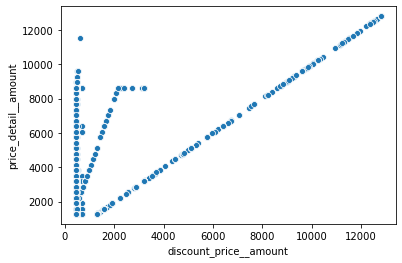

In [10]:
#Scatter Plot to be drawn:
sns.scatterplot(data=df_points, x='discount_price__amount', y='price_detail__amount')

<h3>K-Means Clustering </h3>

In [11]:
#K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
print(kmeans.cluster_centers_)
y = kmeans.fit_predict(points)
print(y)

[[ 495.22404731 8569.35611038]
 [ 572.56918253 1859.99246296]
 [9980.7598702  9980.7598702 ]
 [ 678.20730888 5709.0259304 ]]
[3 2 2 ... 3 2 2]


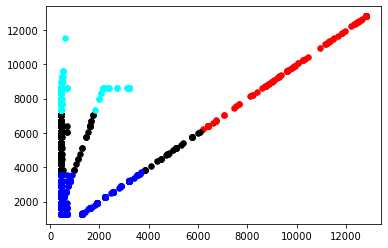

In [12]:
#Plot Graph after clustering
plt.scatter(points[y ==0,0], points[y == 0,1], s=30, c='red')
plt.scatter(points[y ==1,0], points[y == 1,1], s=30, c='black')
plt.scatter(points[y ==2,0], points[y == 2,1], s=30, c='blue')
plt.scatter(points[y ==3,0], points[y == 3,1], s=30, c='cyan')

<h3> Aggloromative Clustering </h3>

In [13]:
#Aggloromative clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [575.0, 575.0, 585.0, 585.0], [565.0, 565.0, 580.0, 580.0], [555.0, 555.0, 572.5, 572.5], [545.0, 545.0, 563.75, 563.75], [535.0, 535.0, 554.375, 554.375], [525.0, 525.0, 544.6875, 544.6875], [515.0, 515.0, 534.84375, 534.84375], [505.0, 505.0, 524.921875, 524.921875], [495.0, 495.0, 514.9609375, 514.9609375], [485.0, 485.0, 504.98046875, 504.98046875], [475.0, 475.0, 494.990234375, 494.990234375], [465.0, 465.0, 484.9951171875, 484.9951171875], [455.0, 455.0, 474.99755859375, 474.99755859375], [445.0, 445.0, 464.998779296875, 464.998779296875], [435.0, 435.0, 454.9993896484375, 454.9993896484375], [425.0, 425.0, 444.99969482421875, 444.99969482421875], [415.0, 415.0, 434.9998474121094, 434.9998474121094], [405.0, 405.0, 424.9999237060547, 424.9999237060547], [395.0, 395.0, 414.99996185302734, 414.99996185302734], [385.0, 385.0, 404.9999809265137, 404.9999809265137], [375.0, 375.0, 394.99999046325684, 394.99999046325684], [3

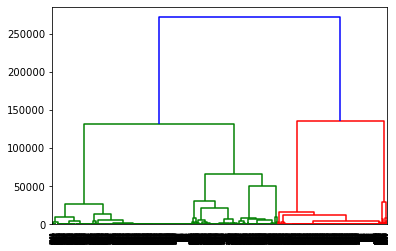

In [14]:
#create dendogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y = hc.fit_predict(points)
print(dendrogram)
print(hc)
print(y)

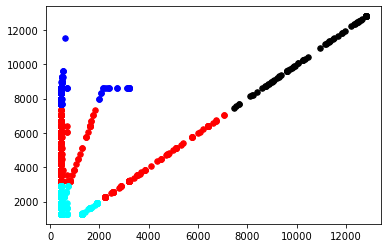

In [15]:
#Plot graph after clustering.
plt.scatter(points[y ==0,0], points[y == 0,1], s=30, c='red')
plt.scatter(points[y ==1,0], points[y == 1,1], s=30, c='black')
plt.scatter(points[y ==2,0], points[y == 2,1], s=30, c='blue')
plt.scatter(points[y ==3,0], points[y == 3,1], s=30, c='cyan')

In [16]:
# Sum the vectors in each cluster
D = 2 # No. of dimensions
lens = {}      # will contain the lengths for each cluster
centroids = {} # will contain the centroids of each cluster
for idx,clno in enumerate(y):
    centroids.setdefault(clno,np.zeros(D)) 
    centroids[clno] += points[idx,:]
    lens.setdefault(clno,0)
    lens[clno] += 1
# Divide by number of observations in each cluster to get the centroid
for clno in centroids:
    centroids[clno] /= float(lens[clno])
print(centroids)

{2: array([ 494.52179657, 8575.74636724]), 3: array([ 507.791004  , 1598.68352965]), 0: array([ 840.72411067, 4907.50988142]), 1: array([10777.95456152, 10777.95456152])}


<h3> DBSCAN Clustering </h3>

In [17]:
#import all packages
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#Select the points to be clustered
df_points = df_sample[['discount_price__amount','price_detail__amount']]
points = df_points.values
points

array([[ 455., 8640.],
       [1920., 1920.],
       [ 455., 1920.],
       ...,
       [ 455., 8640.],
       [ 455., 1280.],
       [ 455., 1280.]])

In [19]:
#Transform the points to appropriate scale.
stscaler = StandardScaler().fit(points)
points = stscaler.transform(points)
print(points)

[[-0.20954214  1.22662434]
 [ 0.76101764 -0.89962167]
 [-0.20954214 -0.89962167]
 ...
 [-0.20954214  1.22662434]
 [-0.20954214 -1.10212129]
 [-0.20954214 -1.10212129]]


In [20]:
#Give the radius and min_points as arameters to DBSCAN clustering.
dbsc = DBSCAN(eps = 0.5, min_samples = 15).fit(points)
print(dbsc)

DBSCAN(min_samples=15)


In [21]:
#Find few metrics of the model
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True
print(labels)
print(core_samples)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(n_clusters_)
print(n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(points, labels))

[0 0 0 ... 0 0 0]
[ True  True  True ...  True  True  True]
3
2
Silhouette Coefficient: 0.738


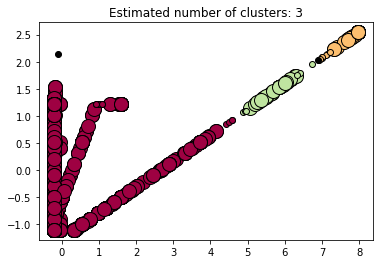

In [22]:
#To plot the graph after DBSCAN clustering. 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = points[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = points[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()